In [13]:
! pip3 install plotly

You are using pip version 19.0.3, however version 21.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [59]:
import plotly.graph_objs as go
import plotly
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import collections

from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True)

dataframe = pd.read_csv("data.csv")


# When did you join this cohort?

In [15]:
labels = ['1A', '1B', '3A']
values = [45,3,1]
colors = ['rgb(56, 75, 126)', 'rgb(18, 36, 37)', 'rbg(2, 25, 100)']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial', marker_colors=colors, hole=.3
                            )])
iplot(fig)

# highest level of education achieved by your parents/caregivers?

In [39]:
data = dataframe["What was the highest level of education achieved by your parents/caregivers?"].value_counts()
values = []
labels = []
colors = []
for i,v in data.items():
    labels.append(i)
    values.append(v)
    colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
print(values)
print(labels)
print(colors)
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial', marker_colors=colors, hole=.3
                            )])
iplot(fig)


[22, 14, 5, 4, 2, 2]
['Bachelors', 'Masters', 'Technical Degree / Diploma', 'Doctorate', 'Some university / college', 'High School']
['#51B5C8', '#5FF849', '#455B56', '#DBFFD9', '#B98777', '#F56835']


# parents' income levels

In [41]:
data = dataframe["What were your parents/caregivers' combined income at the start of university?"].value_counts()
values = []
labels = []
colors = []
for i,v in data.items():
    labels.append(i)
    values.append(v)
    colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial', marker_colors=colors, hole=.3
                            )])
iplot(fig)

[15, 14, 10, 5, 3, 2]
['200k +', '50k - 100k', '100k - 150k', '150k - 200k', "Don't Know", '0 - 50k']
['#A73C28', '#BFCA94', '#6669DC', '#E692D0', '#A44C6A', '#D96D7E']


# high school entrance average

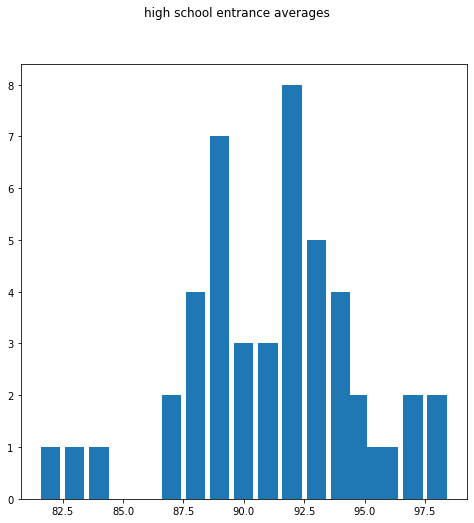

In [49]:
data = dataframe["What was your high school entrance average? (out of 100)"].value_counts()
values = []
labels = []
for i,v in data.items():
    values.append(v)
    labels.append(i)
plt.figure(figsize=(8,8))
plt.suptitle('high school entrance averages')
plt.bar(labels, values)
plt.show()

# How did you discover Management Engineering?

In [68]:
data = dataframe["How did you discover Management Engineering?"]
dist = collections.defaultdict(int)
for string in data:
    # tokenize each string
    if(isinstance(string, str)):
        tokens = string.split(", ")
        for t in tokens:
            dist[t] += 1
    else:
        dist['NaN'] += 1
labels = list(dist.keys())
values = list(dist.values())
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(dist))]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial', marker_colors=colors, hole=.3
                            )])
iplot(fig)

# insights on term averages

# failing a course/exam

In [74]:
course = dataframe["Have you failed a course?"].value_counts()
exam = dataframe["Have you failed a midterm or final before?"].value_counts()
labels = []
values = []
colors = ['rgb(56, 75, 126)', 'rgb(18, 36, 37)']
for i,v in course.items():
    labels.append(i)
    values.append(v)

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial', marker_colors=colors, hole=.3
                            )])
iplot(fig)

labels = []
values = []
for i,v in exam.items():
    labels.append(i)
    values.append(v)

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial', marker_colors=colors, hole=.3
                            )])
iplot(fig)


# insights on class attendance per term